In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
sns.set()

In [2]:
train=pd.read_csv("Desktop/ml/boo!/train.csv")
test=pd.read_csv("Desktop/ml/boo!/test.csv")

In [3]:
list(train.columns.values)

['id',
 'bone_length',
 'rotting_flesh',
 'hair_length',
 'has_soul',
 'color',
 'type']

In [4]:
Id=test["id"]
y=train["type"]

In [5]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [6]:
train.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

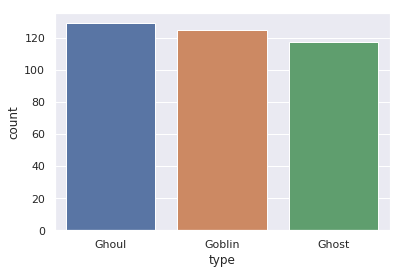

In [7]:
sns.countplot(data=train,x=train["type"])

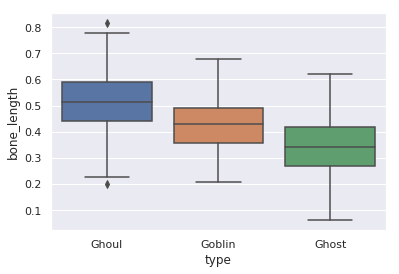

In [8]:
sns.boxplot(x="type",y='bone_length',data=train)

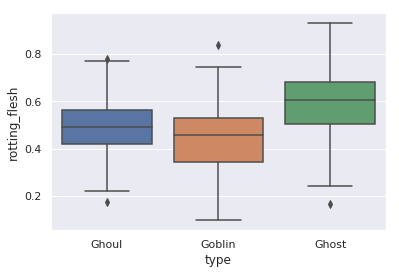

In [9]:
sns.boxplot(x="type",y='rotting_flesh',data=train)

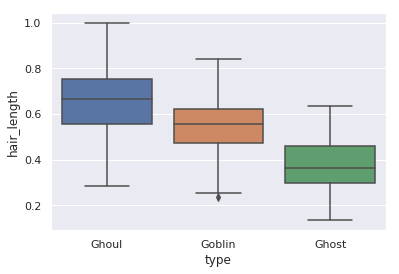

In [10]:
sns.boxplot(x="type",y='hair_length',data=train)

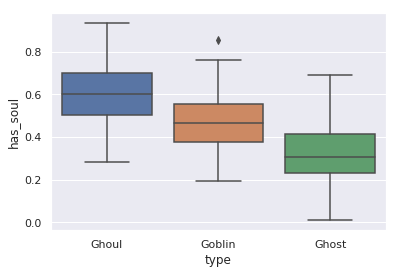

In [11]:
sns.boxplot(x="type",y='has_soul',data=train)

In [12]:
train.color.value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

In [13]:
train.groupby('color').type.value_counts()

color  type  
black  Ghost     14
       Ghoul     14
       Goblin    13
blood  Ghost      6
       Ghoul      4
       Goblin     2
blue   Goblin     7
       Ghost      6
       Ghoul      6
clear  Goblin    46
       Ghoul     42
       Ghost     32
green  Ghost     15
       Goblin    14
       Ghoul     13
white  Ghoul     50
       Ghost     44
       Goblin    43
Name: type, dtype: int64

In [14]:
print(train['type'].value_counts())


Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64


In [15]:
train=train.drop(['id','type'],1)
test=test.drop(['id'],1)
#cross vadlidation train-test split
train = pd.get_dummies(train)


In [16]:
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=0)

In [17]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=7)

In [18]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
pred=rf.predict(x_test)

In [20]:
acc=rf.score(x_test,y_test)
print(acc)

0.75


In [21]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

       Ghost       0.76      0.89      0.82        35
       Ghoul       0.86      0.77      0.81        39
      Goblin       0.64      0.61      0.62        38

   micro avg       0.75      0.75      0.75       112
   macro avg       0.75      0.75      0.75       112
weighted avg       0.75      0.75      0.75       112



In [22]:
rf.fit(train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred_log_reg=clf.predict(x_test)
acc_log_reg=round(clf.score(x_train,y_train)*100,2)
print(str(acc_log_reg)+' percent')

74.52 percent


/home/timtim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/timtim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_log_reg,y_test))

              precision    recall  f1-score   support

       Ghost       0.85      0.88      0.86        40
       Ghoul       0.91      0.59      0.72        54
      Goblin       0.28      0.56      0.37        18

   micro avg       0.69      0.69      0.69       112
   macro avg       0.68      0.67      0.65       112
weighted avg       0.79      0.69      0.71       112



In [25]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hair_length (0.319585)
2. feature has_soul (0.285295)
3. feature bone_length (0.177789)
4. feature rotting_flesh (0.170532)
5. feature color_clear (0.010747)
6. feature color_white (0.009639)
7. feature color_green (0.008315)
8. feature color_black (0.008013)
9. feature color_blue (0.006819)
10. feature color_blood (0.003265)


In [26]:
import re
pattern=re.compile("^color_.*")
cols_to_drop = [ x for x in train.columns if re.match(pattern,x)]

train = train.drop(cols_to_drop,axis=1)


In [27]:
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=0)

In [28]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=7)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
pred=rf.predict(x_test)

In [30]:
acc=rf.score(x_test,y_test)
print(acc)

0.7589285714285714


In [31]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l2',C=1000000,class_weight="balanced")
clf.fit(x_train,y_train)
y_pred_log_reg=clf.predict(x_test)
acc_log_reg=round(clf.score(x_train,y_train)*100,2)
print(str(acc_log_reg)+' percent')

74.9 percent


/home/timtim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/timtim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
from sklearn.svm import SVC,LinearSVC
clf=SVC()
clf.fit(x_train,y_train)
y_pred_svc=clf.predict(x_test)
acc_svc=round(clf.score(x_train,y_train)*100,2)
print(str(acc_svc)+" percent")


76.06 percent


/home/timtim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
y_pred_kn=clf.predict(x_test)
acc_kn=round(clf.score(x_train,y_train)*100,2)
print(str(acc_kn)+" percent")

81.85 percent
